In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
import sys, os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

path = os.path.join(os.path.dirname("classification"), '..', '')
sys.path.insert(1, path)

import multilayer_perceptron.srcs.utils as utils

# 1. Dataset

## 1-1. Circular dataset

X shape:  (1000, 2)
y shape:  (1000, 1)


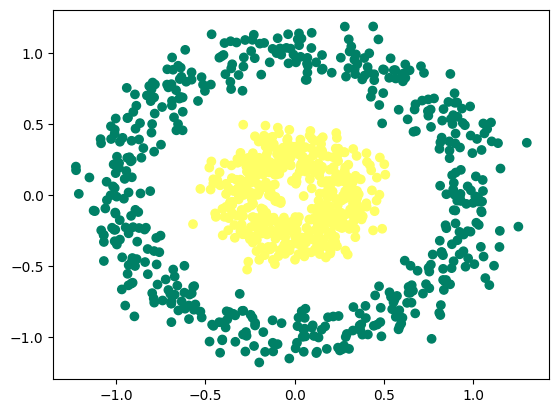

In [2]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X
y = y.reshape((y.shape[0], 1))

print("X shape: ", X.shape)
print("y shape: ", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

## Dataset preprocessing

In [3]:
data = np.hstack((X, y))
print(data.shape, data[:5])

(1000, 3) [[ 0.34226877  0.02953448  1.        ]
 [ 0.02435936 -0.15465885  1.        ]
 [-0.78677748 -0.75718576  0.        ]
 [ 0.08269604  0.1929581   1.        ]
 [-0.21979463  0.23370973  1.        ]]


In [4]:

data_train, data_val = utils.data_spliter(data, 0.8, 0)
data_train, data_test = utils.data_spliter(data_train, 0.9, 0)

print(data_train.shape, data_val.shape, data_test.shape)

x_train, y_train = data_train[:, :2], data_train[:, 2:]
x_val, y_val = data_val[:, :2], data_val[:, 2:]
x_test , y_test = data_test[:, :2], data_test[:, 2:]

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(720, 3) (200, 3) (80, 3)
(720, 2) (200, 2) (80, 2)
(720, 1) (200, 1) (80, 1)


### Plot training dataset

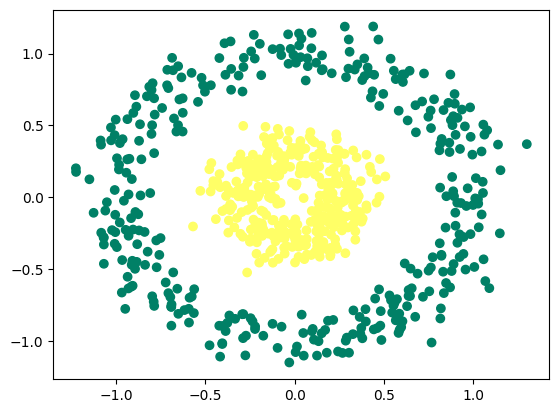

In [5]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="summer")
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="summer")
# plt.scatter(data_train[:, 0], data_train[:, 1], c=data_train[:, 2], cmap="summer")
# plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap="summer")
plt.show()

# 2. Multilayer Perceptron

## 2-1. helper functions

### 2-1-1. plot learning curves function

In [98]:
def plot_learning_curves(X, y, model, history):
    # Generate input data for decision boundary plot
    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Flatten the grid and prepare the input for prediction
    x1_flat = x1_grid.flatten()
    x2_flat = x2_grid.flatten()
    input_grid = np.vstack((x1_flat, x2_flat)).T
    # print(x1_flat.shape, x2_flat.shape, input_grid.shape)

    # Calculate output for each input pair using model.predict
    z_flat = model.predict(input_grid)
    z_flat = (z_flat > 0.5).astype(int)

    # Reshape the output back to the grid shape
    z_grid = z_flat.reshape(x1_grid.shape)

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.plot(history["loss"], label="train loss")
    if "val_loss" in history:
        plt.plot(history["val_loss"], label="valid loss")
    plt.title("Loss")
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(history["accuracy"], label="train accuracy")
    if "val_loss" in history:
        plt.plot(history["val_accuracy"], label="valid accuracy")
    plt.title("Accuracy")
    plt.legend()
    
    # Plotting decision boundary
    plt.subplot(1, 3, 3)
    plt.contourf(x1_grid, x2_grid, z_grid, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar()

    # Plot the dataset points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer", edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

### 2-1-2. train model function

In [7]:
def train_model(x_train, y_train, 
      model,
      optimizer, 
      loss, 
      metrics,
      batch_size,
      epochs,
      validation_data,
      ):
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics)

    net = model.fit(x_train, y_train, validation_data=validation_data, 
                    batch_size=batch_size, 
                    epochs=epochs)
    return net

### 2-1-3. test model function

In [67]:
def test_model(x_test, y_test,
       model,
       ):
    plot_learning_curves(X, y, model.model, model.history)
    print("train accuracy: ", model.history["accuracy"][-1])
    print("valid accuracy: ", model.history["val_accuracy"][-1])

    y_pred = model.model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"test accuracy: {test_acc}")

## 2-2. Evaluation

### 2-2-0. set hyperparameters

In [89]:
lr = 1e-3
batch_size = None
epochs = 30

optimizer = tf.optimizers.SGD(learning_rate=lr)
loss = tf.losses.binary_crossentropy
metrics = ['accuracy']
validation_data = (x_val, y_val)

### 2-2-1. 1-layer perceptron

In [100]:
model = Sequential([
    Dense(units=1, input_shape=(2, ), activation="sigmoid")
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [101]:
model = train_model(x_train, y_train,
      model,
      tf.optimizers.SGD(learning_rate=lr),
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data,
)

Epoch 1/30
23/23 [==============================] - 1s 8ms/step - loss: 0.7678 - accuracy: 0.4958 - val_loss: 0.8186 - val_accuracy: 0.4850
Epoch 2/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7676 - accuracy: 0.4958 - val_loss: 0.8183 - val_accuracy: 0.4850
Epoch 3/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7674 - accuracy: 0.4958 - val_loss: 0.8180 - val_accuracy: 0.4850
Epoch 4/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7672 - accuracy: 0.4958 - val_loss: 0.8178 - val_accuracy: 0.4850
Epoch 5/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7670 - accuracy: 0.4958 - val_loss: 0.8175 - val_accuracy: 0.4850
Epoch 6/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7668 - accuracy: 0.4958 - val_loss: 0.8172 - val_accuracy: 0.4850
Epoch 7/30
23/23 [==============================] - 0s 3ms/step - loss: 0.7666 - accuracy: 0.4958 - val_loss: 0.8170 - val_accuracy: 0.4850
Epoch 8/30
23/23 [==

(10000,) (10000,) (10000, 2)


313/313 [==============================] - 0s 1ms/step


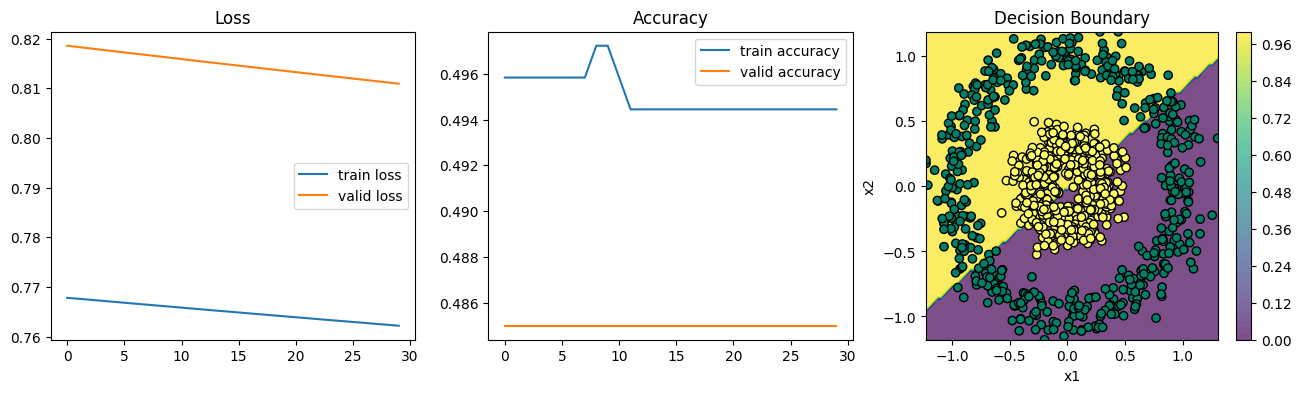

train accuracy:  0.49444442987442017
valid accuracy:  0.48500001430511475
3/3 [==============================] - 0s 2ms/step
test accuracy: 0.525


In [102]:
test_model(x_test, y_test, model)

### 2-2-2. 2-layer multilayer perceptron

In [103]:
model = Sequential([
    Dense(units=2, input_shape=(2, ), activation="relu"),
    Dense(units=1, activation="sigmoid"),
])

In [104]:
model = train_model(x_train, y_train,
      model,
      tf.optimizers.SGD(learning_rate=lr),
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data,
)

Epoch 1/30
23/23 [==============================] - 1s 23ms/step - loss: 0.7484 - accuracy: 0.4931 - val_loss: 0.7523 - val_accuracy: 0.4700
Epoch 2/30
23/23 [==============================] - 0s 17ms/step - loss: 0.7478 - accuracy: 0.5153 - val_loss: 0.7517 - val_accuracy: 0.4700
Epoch 3/30
23/23 [==============================] - 1s 24ms/step - loss: 0.7473 - accuracy: 0.5153 - val_loss: 0.7512 - val_accuracy: 0.4700
Epoch 4/30
23/23 [==============================] - 1s 23ms/step - loss: 0.7467 - accuracy: 0.5139 - val_loss: 0.7506 - val_accuracy: 0.4650
Epoch 5/30
23/23 [==============================] - 0s 14ms/step - loss: 0.7461 - accuracy: 0.5139 - val_loss: 0.7500 - val_accuracy: 0.4650
Epoch 6/30
23/23 [==============================] - 0s 17ms/step - loss: 0.7456 - accuracy: 0.5125 - val_loss: 0.7495 - val_accuracy: 0.4650
Epoch 7/30
23/23 [==============================] - 0s 17ms/step - loss: 0.7450 - accuracy: 0.5139 - val_loss: 0.7489 - val_accuracy: 0.4650
Epoch 8/30
23

(10000,) (10000,) (10000, 2)
313/313 [==============================] - 2s 5ms/step


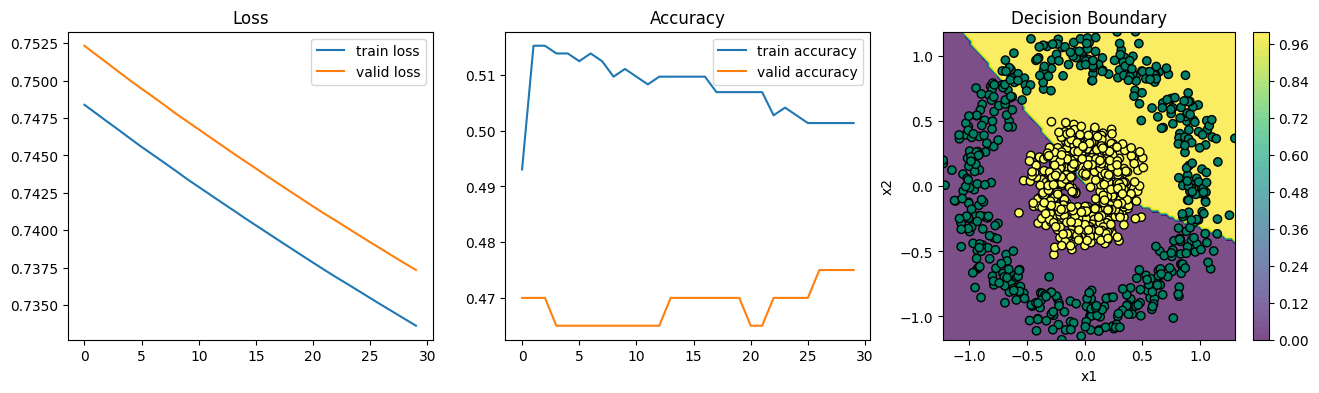

train accuracy:  0.5013889074325562
valid accuracy:  0.4749999940395355
3/3 [==============================] - 0s 5ms/step
test accuracy: 0.525


In [105]:
test_model(x_test, y_test, model)

### 2-2-3. 3-layer multilayer perceptron

In [134]:
# model = NeuralNet()
# network = model.create_network([
#     Dense(2, 4, activation='relu'),
#     Dense(4, 3, activation='relu'),
#     Dense(3, 1, activation='sigmoid')
#     ])

model = Sequential([
    Dense(units=4, input_shape=(2, ), activation="relu"),
    Dense(units=3, activation="relu"),
    Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 4)                 12        
                                                                 
 dense_57 (Dense)            (None, 3)                 15        
                                                                 
 dense_58 (Dense)            (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [135]:
model = train_model(x_train, y_train,
      model,
      tf.optimizers.SGD(learning_rate=lr),
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data,
)

Epoch 1/30
23/23 [==============================] - 1s 24ms/step - loss: 0.7647 - accuracy: 0.4875 - val_loss: 0.7566 - val_accuracy: 0.5200
Epoch 2/30
23/23 [==============================] - 0s 15ms/step - loss: 0.7620 - accuracy: 0.4931 - val_loss: 0.7543 - val_accuracy: 0.5250
Epoch 3/30
23/23 [==============================] - 0s 16ms/step - loss: 0.7594 - accuracy: 0.4944 - val_loss: 0.7521 - val_accuracy: 0.5300
Epoch 4/30
23/23 [==============================] - 0s 19ms/step - loss: 0.7568 - accuracy: 0.4986 - val_loss: 0.7499 - val_accuracy: 0.5350
Epoch 5/30
23/23 [==============================] - 0s 15ms/step - loss: 0.7542 - accuracy: 0.5000 - val_loss: 0.7478 - val_accuracy: 0.5350
Epoch 6/30
23/23 [==============================] - 0s 11ms/step - loss: 0.7518 - accuracy: 0.5000 - val_loss: 0.7457 - val_accuracy: 0.5350
Epoch 7/30
23/23 [==============================] - 0s 14ms/step - loss: 0.7493 - accuracy: 0.5000 - val_loss: 0.7436 - val_accuracy: 0.5350
Epoch 8/30
23

(10000,) (10000,) (10000, 2)
313/313 [==============================] - 2s 7ms/step


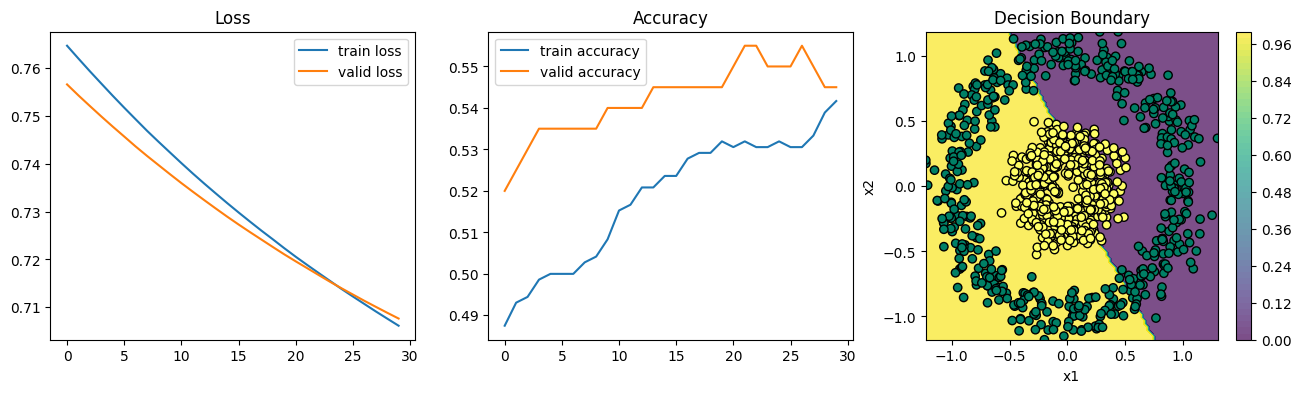

train accuracy:  0.5416666865348816
valid accuracy:  0.5450000166893005
3/3 [==============================] - 0s 17ms/step
test accuracy: 0.5


In [136]:
test_model(x_test, y_test, model)

### 2-2-4. 4-layer multilayer perceptron

In [125]:
# model = NeuralNet()
# network = model.create_network([
#     Dense(2, 10, activation='relu'),
#     Dense(10, 8, activation='relu'),
#     Dense(8, 5, activation='relu'),
#     Dense(5, 1, activation='sigmoid')
#     ])

model = Sequential([
    Dense(units=10, input_shape=(2, ), activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=5, activation="relu"),
    Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                30        
                                                                 
 dense_47 (Dense)            (None, 8)                 88        
                                                                 
 dense_48 (Dense)            (None, 5)                 45        
                                                                 
 dense_49 (Dense)            (None, 1)                 6         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [126]:
model = train_model(x_train, y_train,
      model,
      tf.optimizers.SGD(learning_rate=lr),
      loss,
      metrics,
      batch_size,
      epochs,
      validation_data,
)

Epoch 1/30
23/23 [==============================] - 1s 21ms/step - loss: 0.6920 - accuracy: 0.5208 - val_loss: 0.6928 - val_accuracy: 0.4750
Epoch 2/30
23/23 [==============================] - 0s 16ms/step - loss: 0.6918 - accuracy: 0.5361 - val_loss: 0.6927 - val_accuracy: 0.5150
Epoch 3/30
23/23 [==============================] - 0s 13ms/step - loss: 0.6917 - accuracy: 0.5375 - val_loss: 0.6925 - val_accuracy: 0.5150
Epoch 4/30
23/23 [==============================] - 0s 15ms/step - loss: 0.6915 - accuracy: 0.5458 - val_loss: 0.6923 - val_accuracy: 0.5400
Epoch 5/30
23/23 [==============================] - 0s 13ms/step - loss: 0.6914 - accuracy: 0.5583 - val_loss: 0.6921 - val_accuracy: 0.5550
Epoch 6/30
23/23 [==============================] - 0s 10ms/step - loss: 0.6912 - accuracy: 0.5736 - val_loss: 0.6920 - val_accuracy: 0.5650
Epoch 7/30
23/23 [==============================] - 0s 11ms/step - loss: 0.6911 - accuracy: 0.5806 - val_loss: 0.6918 - val_accuracy: 0.5700
Epoch 8/30
23

(10000,) (10000,) (10000, 2)
313/313 [==============================] - 2s 7ms/step


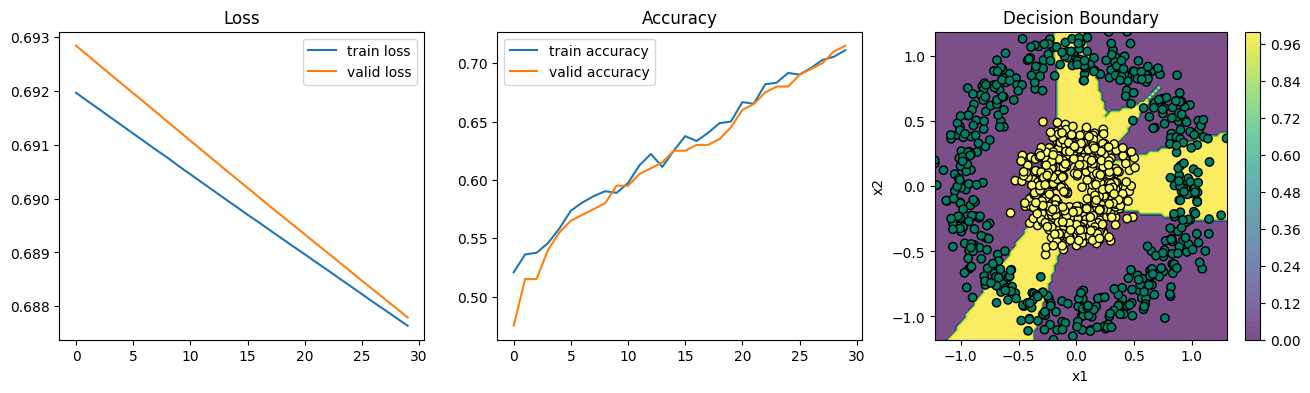

train accuracy:  0.7111111283302307
valid accuracy:  0.7149999737739563
3/3 [==============================] - 0s 19ms/step
test accuracy: 0.6625


In [127]:
test_model(x_test, y_test, model)